In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка датасета Titanic
df = sns.load_dataset('titanic')
print("Размер данных:", df.shape)
df.head()


Размер данных: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [78]:
# Обзор структуры данных
print(df.info())

# Проверка наличия пропущенных данных
print("\nПропущенные значения:")
print(df.isnull().sum())

# Основные статистические метрики
print("\nОсновные статистики:")
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Пропущенные значения:
survived         0
pclass           0
sex          

In [79]:
# Заполнение пропущенных значений
df['age'].fillna(df['age'].median(), inplace=True)  # Средний возраст
df['embark_town'].fillna('Unknown', inplace=True)   # Пропущенные порты
df.drop(columns=['deck'], inplace=True)            # Удаление столбца с большим количеством пропусков

# Убедимся, что пропусков нет
print("\nПропущенные значения после обработки:")
print(df.isnull().sum())



Пропущенные значения после обработки:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


<ipython-input-79-8b9028c3dd9b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)  # Средний возраст
<ipython-input-79-8b9028c3dd9b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

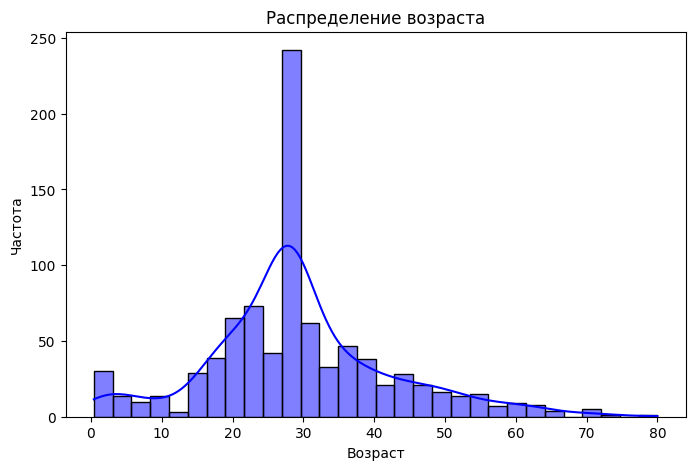

In [80]:
# Распределение возраста
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title("Распределение возраста")
plt.xlabel("Возраст")
plt.ylabel("Частота")
plt.show()


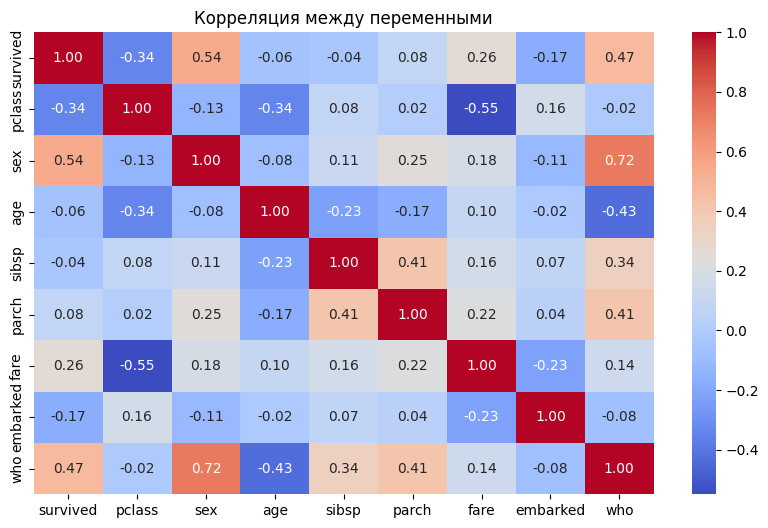

In [81]:
# Преобразование категориальных переменных в числовые
df_encoded = df.copy()
df_encoded['sex'] = df_encoded['sex'].map({'male': 0, 'female': 1})
df_encoded['embarked'] = df_encoded['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_encoded['class'] = df_encoded['class'].map({'First': 1, 'Second': 2, 'Third': 3})
# Convert 'who' column to numerical representation
df_encoded['who'] = df_encoded['who'].map({'man': 0, 'woman': 1, 'child': 2}) #added this line

# Построение тепловой карты корреляции
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f') # changed this line
plt.title("Корреляция между переменными")
plt.show()

<ipython-input-82-edd4f4b7ded8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_counts.index, y=survival_counts.values, palette='viridis')


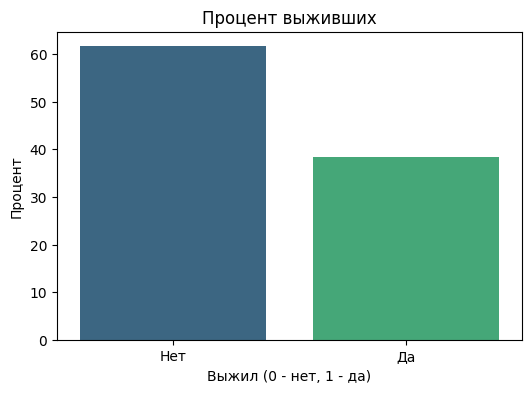

In [82]:
# Процент выживших
survival_counts = df['survived'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_counts.index, y=survival_counts.values, palette='viridis')
plt.title("Процент выживших")
plt.xlabel("Выжил (0 - нет, 1 - да)")
plt.ylabel("Процент")
plt.xticks([0, 1], ['Нет', 'Да'])
plt.show()


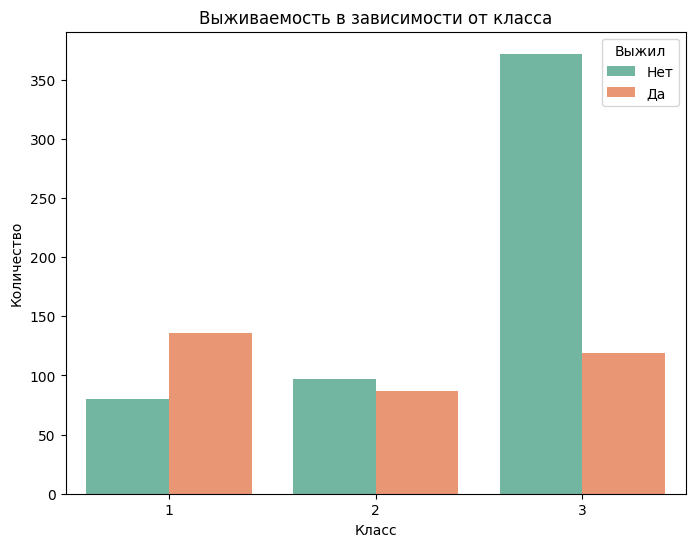

In [83]:
# Выживаемость в зависимости от класса
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='pclass', hue='survived', palette='Set2')
plt.title("Выживаемость в зависимости от класса")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.legend(title='Выжил', loc='upper right', labels=['Нет', 'Да'])
plt.show()


<ipython-input-84-9999dcf3a1cd>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sex', y='survived', ci=None, palette='pastel')
<ipython-input-84-9999dcf3a1cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='sex', y='survived', ci=None, palette='pastel')


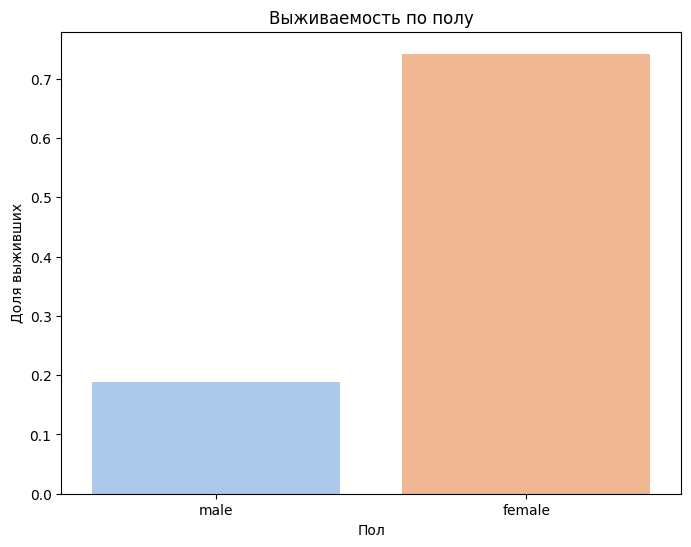

In [84]:
# Выживаемость по полу
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='sex', y='survived', ci=None, palette='pastel')
plt.title("Выживаемость по полу")
plt.xlabel("Пол")
plt.ylabel("Доля выживших")
plt.show()


In [85]:
# Общие выводы
print("Средний возраст пассажиров:", df['age'].mean())
print("Общий процент выживших:", df['survived'].mean() * 100)

# Группировка данных
survival_by_class = df.groupby('pclass')['survived'].mean() * 100
print("\nПроцент выживших по классам:")
print(survival_by_class)


Средний возраст пассажиров: 29.36158249158249
Общий процент выживших: 38.38383838383838

Процент выживших по классам:
pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64


In [86]:
df.to_csv('titanic_cleaned.csv', index=False)
